# Magíster en Data Science
## Proyecto Final Network Science
### Profesor : Leo Ferres PhD
--- 

#### Instrucciones : 

En grupos de máximo tres alumnos deberán demostrar los conocimientos adquiridos en la asignatura.

Plazo de Entrega : 01-Marzo-2020  23:59:59

#### Integrantes : 
__*Sergio Arancibia; Roy Barrera; José Pérez*__

---

### INTRODUCCIÓN :

En el presente trabajo analizaremos los tres principales tipos de gráfos, a saber : 

- No Dirigidos, 
- Dirigidos y 
- Multigrafos (dirigidos).

Para lo cual utilizaremos principalmente la librería NetworkX y nos apoyar memos con pandas, collections y matplotlib.

#### PRIMERA PARTE 
### <font color='red'>Grafos NO Dirigidos</font> | Undirected Graphs


Un grafo __NO dirigido__ es aquél en que las aristas(edges) no expresan dirección o sentido entre los nodos(nodes).  

Este es el tipo más simple de grafo, el cual, en __NetworkX__, se construye con el comando __Graph.__

Para demostrar grafos no dirigidos hemos decidido utilizar los datos de la copa del mundo de ajedrez 2019 de la __FIDE__ ("<strong>F</strong>édération <strong>I</strong>nternationale <strong>d</strong>es <strong>É</strong>checs" trad. Federación Internacional de Ajedrez). El cuál enfrentó a 128 jugadores en un total de 420 partidas. Los dos primeros clasificados recibieron plazas para el Torneo de Candidatos de 2020 que determinará al retador del Campeón del Mundo, **_Magnus Carlsen_**.

En lo que respecta al analisis de Red: Cada __Jugador__ se considera un __nodo__ y cada __enfrentamiento entre 2 jugadores__ se considera una __arista__ del grafo.  

El grafo es __no dirigido__ debido a que un __enfrentamiento__ es en realidad una serie de __partidas__, donde los jugadores se alternan en el uso de las piezas blancas y negras.  De este manera "Arancibia enfrenta a Pérez" es lo mismo que "Pérez enfrenta a Arancibia", no importando cuantas partidas jueguen entre ellos.


Fuente : https://es.chessbase.com/torneos/copa-del-mundo-de-ajedrez-2019

Más Información : www.fide.com; https://www.ajefech.cl; https://youtu.be/iEH2RcwT0r4


#### a) Cargar el archivo de datos y explorar el dataframe

Importando las librerias necesarias

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections


In [2]:
df = pd.read_csv('cup2019_Ajedrez01.csv',sep=';')

print("\nInformación del dataset cargado :\n---------------------------------\n")
df.info()

print("\nLista de Columnas :\n-------------------")
list(df)



Información del dataset cargado :
---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
Date       420 non-null object
Round      420 non-null float64
White      420 non-null object
Black      420 non-null object
Result     420 non-null object
PARTIDO    420 non-null object
dtypes: float64(1), object(5)
memory usage: 19.8+ KB

Lista de Columnas :
-------------------


['Date', 'Round', 'White', 'Black', 'Result', 'PARTIDO']

In [3]:
df.head(5)


,Date,Round,White,Black,Result,PARTIDO
0,2019.09.10,1.1,Press Shaun,Ding Liren,0-1,1.e4 c5 2.Nc3 d6 3.g3 Nc6 4.Bg2 g6 5.d3 Bg7\t6...
1,2019.09.10,1.2,Giri Anish,Mohammad Fahad Rahman,1-0,1.e4 c5 2.Nf3 d6 3.Bb5+ Bd7 4.Bxd7+ Qxd7 5.c4 ...
2,2019.09.10,1.3,Anwuli Daniel,Vachier-Lagrave Maxime,0-1,1.c4 Nf6 2.Nc3 e5 3.Nf3 Nc6 4.g3 Bb4 5.Bg2 O-O...
3,2019.09.10,1.4,So Wesley,Duran Vega Sergio,1-0,1.c4 e5 2.g3 Nf6 3.Bg2 d5 4.cxd5 Nxd5 5.Nc3 Nb...
4,2019.09.10,1.5,Gan-Erdene Sugar,Nepomniachtchi Ian,0-1,1.e4 c5 2.Nf3 d6 3.d4 cxd4 4.Nxd4 Nf6 5.Nc3 a6...


In [4]:
df.tail(5)


,Date,Round,White,Black,Result,PARTIDO
415,2019.09.26,43.2,Vachier-Lagrave Maxime,Radjabov Teimour,1/2-1/2,1.e4 c5 2.Nf3 Nc6 3.Bb5 g6 4.Bxc6 bxc6 5.d4 cx...
416,2019.09.27,44.1,Yu Yangyi,Ding Liren,1/2-1/2,1.d4 Nf6 2.c4 e6 3.Nc3 Bb4 4.Qc2 d5 5.a3 Bxc3+...
417,2019.09.27,44.2,Radjabov Teimour,Vachier-Lagrave Maxime,1-0,1.Nf3 Nf6 2.c4 c5 3.Nc3 d5 4.cxd5 Nxd5 5.e3 Nx...
418,2019.09.28,45.1,Yu Yangyi,Ding Liren,1/2-1/2,1.d4 Nf6 2.c4 e6 3.Nc3 Bb4 4.Nf3 O-O 5.Bg5 c5\...
419,2019.09.28,46.1,Ding Liren,Yu Yangyi,1-0,1.c4 e5 2.Nc3 Bb4 3.Nd5 a5 4.Nf3 d6 5.a3 Bc5\t...


Referencias : 
https://realpython.com/python-csv/ ; 
https://riptutorial.com/es/pandas/example/5745/lista-de-nombres-de-columna-de-dataframe

#### b) Crear un grafo No dirigido con NetworkX, a partir de los datos cargados

In [5]:
gChess = nx.Graph(name="Ajedrez")

for indice_fila, fila in df[['White', 'Black', 'Result']].iterrows():
    gChess.add_node(fila['White'])
    gChess.add_node(fila['Black'])
    gChess.add_edge(fila['White'],fila['Black'])

print (nx.info(gChess))  


Name: Ajedrez
Type: Graph
Number of nodes: 128
Number of edges: 126
Average degree:   1.9688


#### Comentarios :

__1__. ¿ Por qué, si en el dataset inicialmente había __420 partidas__, el grafo resultante tiene solamente __126 aristas__ ? .

__R :__ Cada arista del grafo, __no representa__ una partida, sino un enfrentamiento (es decir, una serie de partidas) entre dos jugadores A y B.  En un grafo NO dirigido, la arista A-->B es igual a la arista B-->A, por lo tanto NetworkX __NO INCLUYE__ lo que considera "aristas repetidas".


__2__. Pero entre __128 jugadores__ debería producirse __127 enfrentamientos__. ¿Por qué , aparentemente, falta 1?

__R :__ Este torneo en particular buscaba __2 ganadores__, no solo 1.  Por lo que no se produjo un enfrentamiento entre ellos. (por lo menos, en el dataset utilizado, no hay información disponible sobre este enfrentamiento "faltante").


Esto es interesante de tener en cuenta en las visualizaciones del grafo no dirigido que se presentan a continuación.

---


Visualización del grafo, Layout por defecto.

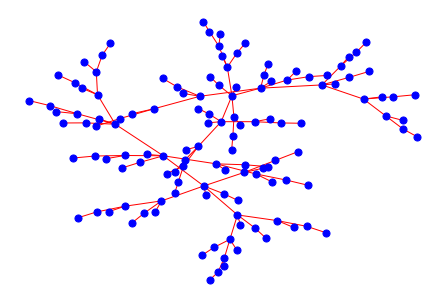

In [9]:
nx.draw(gChess, with_labels=False, node_color='Blue', edge_color='Red', font_size =8  , node_size = 50)


#### Comentarios  :

__3__.  A primera vista, la imagen parece ser una red o grafo completo, pero, dado que sabemos que el número de aristas es distinto al número de nodos menos 1, __sospechamos__ que no es un red completa.   Una forma de resolverlo es que podemos re-ejecutar la gráfica "n" veces, hasta que "se revele"...

---

Re ejecucíon de la Visualización del Grafo con el layout por defecto.

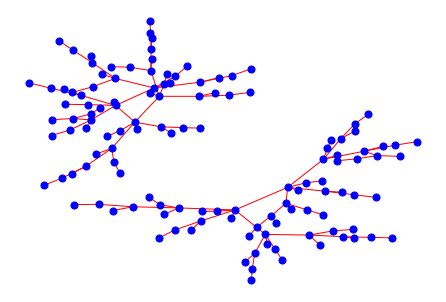

In [41]:
nx.draw(gChess, with_labels=False, node_color='Blue', edge_color='Red', font_size=8, node_size=50)


#### Comentarios :

__4__. Esta nueva representación del grafo muestra claramente que existen 2 comunidades separadas en él. No obstante tomó varias ejecuciones obtener este resultado. Otra forma, más simple, de resolverlo, en lugar de re-ejecutar "n" veces, es probar con otros layouts, como por ejemplo SPECTRAL, para despejar inmediatamente la duda o realizar un análisis de comunidades o realizar ambos procedimientos.

---

#### c) Analizando las "comunidades" detectadas al interior del grafo

Visualización del grafo, Layout espectral.

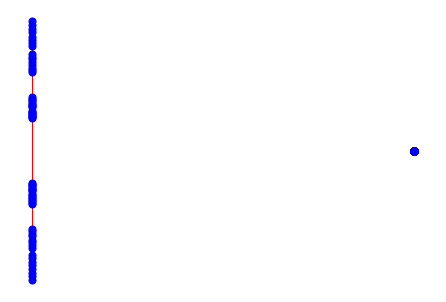

In [42]:
nx.draw_spectral(gChess, with_labels=False, node_color='Blue', edge_color='Red', font_size =8  , node_size = 50)


Otra forma de analizar el grafo, es utilizar NetworkX para verificar las comunidades existentes

In [43]:
comunidad = list(nx.connected_components(gChess))
cant_comunidades = len(comunidad)
print('\nCantidad de "Comunidades" o "Segmentos" en la Red gChess : ', cant_comunidades, '\n')



Cantidad de "Comunidades" o "Segmentos" en la Red gChess :  2 



Revisando los elementos dentro de cada una de las comunidades detectadas en el grafo

In [44]:
for n in range (cant_comunidades):
    print ('\nComunidad ', n, ":\n---------------\n" )
    print(comunidad[n])
    print('--')



Comunidad  0 :
---------------

{'Firouzja Alireza', 'Naiditsch Arkadij', 'Wei Yi', 'Abasov Nijat', 'Fedoseev Vladimir', 'Sevian Samuel', 'Hovhannisyan Robert', 'Xu Xiangyu', 'Rakhmanov Aleksandr', 'Sarana Alexey', 'Anton Guijarro David', 'Wojtaszek Radoslaw', 'Adhiban B.', 'Bok Benjamin', 'Urkedal Frode Olav Olsen', 'Pashikian Arman', 'Ding Liren', 'Grischuk Alexander', 'Vitiugov Nikita', 'Narayanan.S.L', 'So Wesley', 'Gonzalez Vidal Yuri', 'Alekseenko Kirill', 'Christiansen Johan-Sebastian', 'Santos Ruiz Miguel', 'Saric Ivan', 'Ganguly Surya Shekhar', 'Ghaem Maghami Ehsan', 'Press Shaun', 'Petrov Nikita', 'Aravindh Chithambaram VR.', 'Adams Michael', 'Grandelius Nils', 'Predke Alexandr', 'Demchenko Anton', 'Pultinevicius Paulius', 'Cordova Emilio', 'Vidit Santosh Gujrathi', 'Megaranto Susanto', 'Gan-Erdene Sugar', 'Bartel Mateusz', 'Pichot Alan', 'Harikrishna Pentala', 'Duran Vega Sergio', 'Pridorozhni Aleksei', 'Dominguez Perez Leinier', 'Rodshtein Maxim', 'Escobar Forero Alder', '

Para visualizar mejor el fenomeno, "se pinta" de colores distintos cada una de las comunidades identificadas :

In [46]:
color = ['blue','red','green','yellow','orange','cyan']  # soporta hasta 6 comunidades
mapeo_colores = []

for nodo in gChess:
    for X in range(cant_comunidades):
        if nodo in comunidad[X]:
            mapeo_colores.append(color[X])


Se vuelve a graficar, otra vez con el layout por defecto, para visualizar el efecto

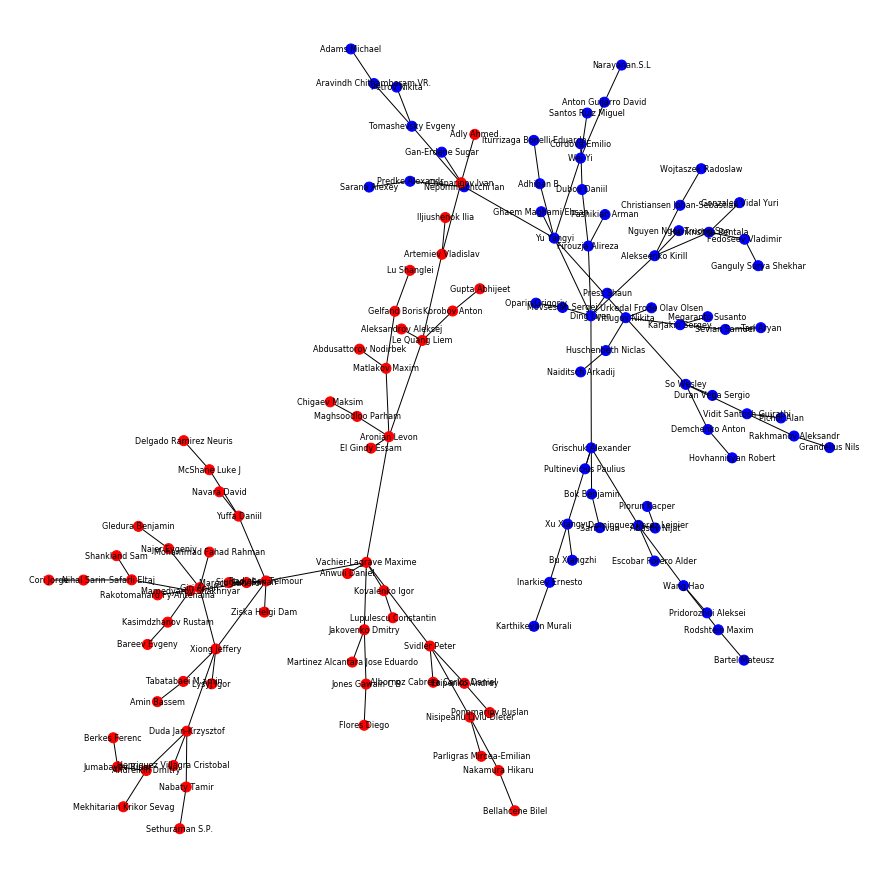

In [47]:
plt.figure(1,figsize=(12,12)) 
nx.draw(gChess, with_labels=True, node_color=mapeo_colores, edge_color='black', font_size=8, node_size=100, label_pos=1)
plt.show()


#### d) Analizando las medidas de Centralidad (importancia) de un nodo dentro de la red.

Ya sabemos que hay 2 comunidades, las cuales hemos identificamos visualmente con 2 colores contrastantes. Ahora quisieramos saber la importancia de algunos nodos en la Red, para lo cual utilizaremos las medidas de Centralidad vistas en clase (De Grado, de Cercanía y de Intermediación).  De estas tres y dada la naturaleza del problema (de los datos que estamos analizando) creemos que lo más adecuado es trabajar en base al grado del nodo (que tan conectado está el nodo dentro de la red).

In [48]:
grado = nx.degree(gChess)

GradoNodo={}
for k in grado:
    keyValue=k
    GradoNodo[keyValue[0]]=keyValue[1]
    

Agregamos "peso" a cada nodo, de forma proporcional a su Grado y volvemos a visualizar el grafo con el layout por defecto.

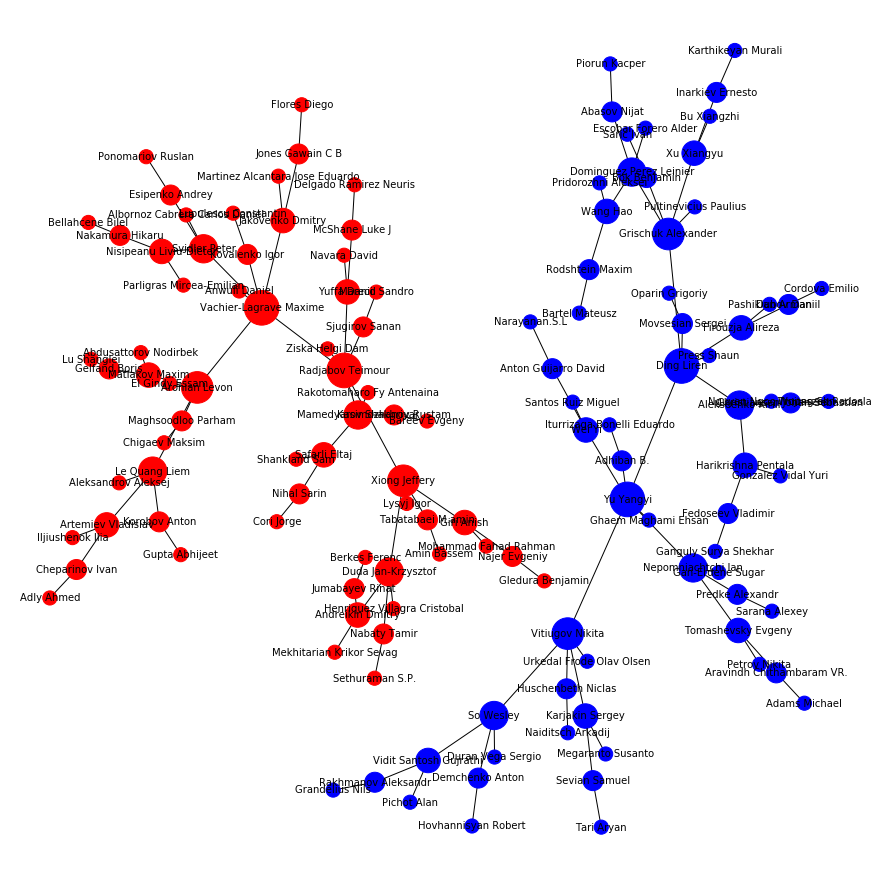

In [49]:
plt.figure(2,figsize=(12,12)) 
nx.draw(gChess, with_labels=True, node_color=mapeo_colores, edge_color='black' , font_size=10  ,
        node_size=[x * 200 for x in GradoNodo.values()] , label_pos=0 )
plt.show()


### Copa del Mundo de Ajedrez de la FIDE 2019. 

Los dos primeros clasificados recibirán plazas en el Torneo de Candidatos 2020 que determinará al retador del Campeón del Mundo, Magnus Carlsen

https://es.chessbase.com/post/copa-del-mundo-de-ajedrez-final-y-puestos-tres-y-cuatro-partida-2

01/10/2019 – Entre el 9 de septiembre y el 4 de octubre se disputa la Copa del Mundo de la FIDE, en Khanty-Mansiysk (Siberia). Dicha competición forma parte del circuito por el Campeonato del Mundo de Ajedrez y se disputa por formato eliminatorio. Inicialmente participarán 128 jugadores de 47 paíes. Los dos finalistas de la Copa del Mundo se clasificarán para el Torneo de Candidatos 2020 que determinará al retador de Magnus Carlsen por el título mundial.

Las partidas de la Copa del Mundo se disputarán en el Centro de Ajedrez de la Academia de Ajedrez de Ugra.  
https://khantymansiysk2019.fide.com/en/results/tournament-tree/   : 

#### e) Realizando otros análisis sobre el grafo

Reciclamos nuestros desarrollos anteriores (tareas 1 y 2) para analizar las medidas de centralidad de los nodos, el histograma del grado y el cumplimiento de la paradoja de la amistad.

In [50]:
def dataframe(GrafoX):
    
    # Número de Conexiones de un nodo (Grado:K)
    gradoK = nx.degree(GrafoX)
    lista_gradoK = []
    for i in gradoK:
        keyValue=i
        lista_gradoK.append(keyValue[1]) 
    
    # Centralidad de Grado (Degree)
    DegCen = nx.degree_centrality(GrafoX)
    lista_DegCen = []
    for i in DegCen.values():
        lista_DegCen.append(i)
        
    # Centralidad de Cercanía (Closeness)
    CloCen = nx.closeness_centrality(GrafoX)
    listaCloCen = []
    for i in CloCen.values():
        listaCloCen.append(i)

    # Centralidad de Intermediación (Betweenness)
    BetCen = nx.betweenness_centrality(GrafoX)
    listaBetCen = []
    for i in BetCen.values():
        listaBetCen.append(i)

    # arma el dataframe
    salida = pd.DataFrame(list(zip(list(DegCen.keys()),lista_gradoK, lista_DegCen, listaCloCen, listaBetCen)),
                         columns =['Nodo','Grado','Degree', 'Closeness', 'Betweenness'])
    salida.sort_values(by='Degree', inplace=True, ascending=False )
    salida.reset_index(inplace=True, drop=True)
    salida = salida.iloc[0:12].copy()
    return salida


In [51]:
def paradoja_amistad (GrafoX):
    cantidad_de_nodos = GrafoX.number_of_nodes()
    grado = GrafoX.degree()
    suma1 = 0 
    suma2 = 0
    cantidad_de_nodos = GrafoX.number_of_nodes()
    for nodo in GrafoX:
        k = GrafoX.degree[nodo]
        suma1  = suma1 + k
        suma2  = suma2 + ( k * k )
    mis_amigos = suma1 / cantidad_de_nodos       # < k > 
    promedio_amigos_de_mis_amigos = ( (suma2 / cantidad_de_nodos) / mis_amigos )   # knn(k)
    diferencia = (promedio_amigos_de_mis_amigos - mis_amigos)
    return round(mis_amigos,4), round(promedio_amigos_de_mis_amigos,4), round(diferencia,4)


In [52]:
def verifica_paradoja(GrafoX):
    k, knn, resta = paradoja_amistad(GrafoX)  
    if resta > 0 :
        conclusion = 'Si, '
    else:
        conclusion = 'No '
    conclusion = conclusion + 'se cumple la paradoja de la amistad.'   
    return 'knn(k) = '+ str(knn)+' ; <k> = ' + str(k) + ' ; knn(k) - <k> = ' + str(resta) + ' ; por lo tanto ' + conclusion


In [53]:
def histograma(GrafoX):
    grados_ordenados = sorted([d for n, d in GrafoX.degree()], reverse=True)
    
    NGrados = collections.Counter(grados_ordenados)
    grado_k, n_nodos = zip(*NGrados.items())

    fig, ax = plt.subplots()
    plt.bar(grado_k, n_nodos, width=0.80, color='cyan')
    plt.xlabel("Grado k")
    plt.ylabel("Nodos")
    ax.set_xticks([d + 0.4 for d in grado_k])
    ax.set_xticklabels(grado_k)

    x = paradoja_amistad(GrafoX)
    plt.axvline(x[0]+0.4, linewidth=1.5, color='g', label='<k> = {}'.format(x[0]), linestyle='--')
    plt.axvline(x[1]+0.4, linewidth=1.5, color='r', label='<k^2>/<k> = {}'.format(x[1]), linestyle='-.')
    plt.legend(('<k> = {}'.format(x[0]), '<k^2>/<k> = {}'.format(x[1])))
    
    plt.show()
    


Centralidad del Grafo :
-----------------------

                      Nodo  Grado    Degree  Closeness  Betweenness
0               Ding Liren      6  0.047244   0.162771     0.162730
1                Yu Yangyi      6  0.047244   0.162771     0.162730
2   Vachier-Lagrave Maxime      6  0.047244   0.162771     0.162730
3         Radjabov Teimour      6  0.047244   0.162771     0.162730
4            Xiong Jeffery      5  0.039370   0.139518     0.098738
5       Grischuk Alexander      5  0.039370   0.139518     0.098738
6            Aronian Levon      5  0.039370   0.139518     0.098738
7          Vitiugov Nikita      5  0.039370   0.139518     0.098738
8            Le Quang Liem      4  0.031496   0.114897     0.050744
9        Alekseenko Kirill      4  0.031496   0.130217     0.050744
10      Duda Jan-Krzysztof      4  0.031496   0.114897     0.050744
11           Svidler Peter      4  0.031496   0.130217     0.050744


Histograma :
------------



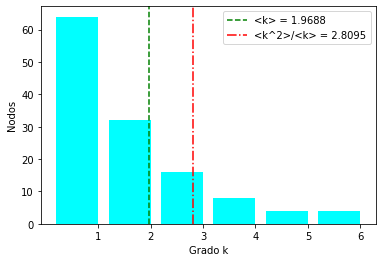

Verifica Paradoja de la Amistad :
---------------------------------

knn(k) = 2.8095 ; <k> = 1.9688 ; knn(k) - <k> = 0.8408 ; por lo tanto Si, se cumple la paradoja de la amistad.




In [54]:
print ('\nCentralidad del Grafo :\n-----------------------\n')
print(dataframe(gChess))
print ('\n')

print('Histograma :\n------------\n')
histograma(gChess)

print('Verifica Paradoja de la Amistad :\n---------------------------------\n')
print(verifica_paradoja(gChess))

print('\n')


#### Observaciones : 

__5__. Se podría mostrar la matriz de adyacencia y grado de los nodos del Grafo, pero dado la cantidad de elementos (mas de 100), no se consideró como un aporte a este trabajo.  

---


#### SEGUNDA PARTE 
### <font color='red'>Grafos Dirigidos</font> | Directed Graphs

Un grafo dirigido es aquél en que las aristas(edges) expresan dirección o sentido entre los nodos(nodes).

Este tipo de grafo, en NetworkX, se construye con el comando DiGraph.

Para realizar esta parte del proyecto se trabajó con el los resultados de los partidos de la segunda fase (eliminación) de la Champions League.   Este prestigioso torneo de fútbol, reune a los clubes campeones de las diferentes ligas Europeas. Dividiéndose en 2 Fases : Fase de Grupos y Fase de eliminación (16 equipos).   

Se intenta determinar si en el último tiempo algún equipo ha sido un "claro dominador" del Torneo.  Para efectos del análisis se toma en consideración los resultados de los últimos 8 años (2012 a 2019), considerando cada equipo como un nodo y cada partido como una arista del grafo.

Se opta por realizar un __grafo dirigido__ con estos datos, ya que cada arista representará un encuentro entre un equipo A y un equipo B, donde el partido A v/s B   (A "Local" y B "Visitante") es distinto del partido B v/s A, independiente de que los resultados pudieran haber sido los mismos en ambos encuentros.

Fuente : https://www.uefa.com/uefachampionsleague/


#### a) Se importan las librerias necesarias y se carga el set de datos

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections


In [56]:
df2 = pd.read_csv('DataSetChampionsLeagueFinales.csv',sep=';')

print("\nInformación del dataset cargado :\n---------------------------------\n")
df2.info()

print("\nLista de Columnas :\n-------------------")
list(df2)



Información del dataset cargado :
---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 5 columns):
Fecha             232 non-null object
Hora              232 non-null object
Equipo1           232 non-null object
ResultadoFinal    232 non-null object
Equipo2           232 non-null object
dtypes: object(5)
memory usage: 9.2+ KB

Lista de Columnas :
-------------------


['Fecha', 'Hora', 'Equipo1', 'ResultadoFinal', 'Equipo2']

In [57]:
df2.head(5)


,Fecha,Hora,Equipo1,ResultadoFinal,Equipo2
0,14/Feb/2012,20:45,Olympique Lyonnais,1-0,APOEL
1,14/Feb/2012,20:45,Bayer Leverkusen,1-3,Barcelona
2,15/Feb/2012,18:00,Zenit Saint Petersburg,3-2,Benfica
3,15/Feb/2012,20:45,AC Milan,4-0,Arsenal
4,21/Feb/2012,18:00,CSKA Moskva,1-1,Real Madrid


In [58]:
df2.tail(5)


,Fecha,Hora,Equipo1,ResultadoFinal,Equipo2
227,30/Apr/2019,21:00,Tottenham Hotspur,0–1,Ajax
228,01/May/2019,21:00,Barcelona,3–0,Liverpool
229,07/May/2019,21:00,Liverpool,4–3,Barcelona
230,08/May/2019,21:00,Ajax,3–3,Tottenham Hotspur
231,01/Jun/2019,21:00,Tottenham Hotspur,0–2,Liverpool


In [59]:
df2.describe()


,Fecha,Hora,Equipo1,ResultadoFinal,Equipo2
count,232,232,232,232,232
unique,136,5,42,54,42
top,12/Apr/2017,20:45,Real Madrid,1-0,Real Madrid
freq,3,196,25,21,23


Para poder comprender mejor estos datos es necesario concatenar "Fecha" y "Hora" y convertirlo en datetime

In [60]:
df3 = pd.DataFrame()

df3['FechaHora'] = pd.to_datetime (df2['Fecha']+' '+df2['Hora']) 
df3['Equipo1'] = df2['Equipo1']
df3['Equipo2'] = df2['Equipo2']
df3['Marcador'] = df2['ResultadoFinal']


In [61]:
df3.head(5)


,FechaHora,Equipo1,Equipo2,Marcador
0,2012-02-14 20:45:00,Olympique Lyonnais,APOEL,1-0
1,2012-02-14 20:45:00,Bayer Leverkusen,Barcelona,1-3
2,2012-02-15 18:00:00,Zenit Saint Petersburg,Benfica,3-2
3,2012-02-15 20:45:00,AC Milan,Arsenal,4-0
4,2012-02-21 18:00:00,CSKA Moskva,Real Madrid,1-1


In [62]:
df3.describe()


,FechaHora,Equipo1,Equipo2,Marcador
count,232,232,232,232
unique,143,42,42,54
top,2018-03-07 20:45:00,Real Madrid,Real Madrid,1-0
freq,3,25,23,21
first,2012-02-14 20:45:00,NaN,NaN,NaN
last,2019-06-01 21:00:00,NaN,NaN,NaN


#### Observaciones  : 

Sin realizar un grafo todavía, el analisis visual de la data nos proporciona la siguiente información :
- Se realizaron 232 partidos
- En 143 fechas (fecha y hora) distintas
- Se enfrentaron a 42 equipos distintos que jugaron como local y 42 equipos que jugaron como visita.
    * (de momento no se puede determinar que se trata de los mismos 42 en cada caso o si existen diferencias)
- "Real Madrid" fue el equipo que más partidos jugó de local (25 veces) y más veces jugó de visita (23 veces)
- Los partidos analizados se jugaron entre Febrero de 2012 y Junio de 2019
- El marcador que más se repitió fue 1-0 (21 veces)

---

Se verifican los equipos, para saber si se trata siempre de los mismos 42

In [63]:
df_Local = pd.DataFrame(df3['Equipo1'].unique())
df_Visita = pd.DataFrame(df3['Equipo2'].unique())

print ( len(df_Local), len(df_Visita) )


42 42


In [64]:
df_Equipos = df_Local.merge(df_Visita, how='outer', indicator='union')

df_Equipos.rename(columns={ 0: 'Equipo'}, inplace=True)
df_Equipos.set_index('Equipo',inplace=True)

print( len(df_Equipos[ df_Equipos['union'] != 'both' ]) )  # Cuantos equipos NO están en AMBOS grupos  


0


In [65]:
 df_Equipos.sort_values('Equipo')
    

,union
Equipo,
AC Milan,both
APOEL,both
Ajax,both
Arsenal,both
Atletico Madrid,both
Barcelona,both
Basel,both
Bayer Leverkusen,both
Bayern Munchen,both


Habiéndose comprobado que se trata de los mismos 42 equipos, se realiza el grafo dirigido

In [66]:
gChampions = nx.DiGraph(name="Champions (Dirigido)")

for indice_fila, fila in df3[['Equipo1', 'Equipo2']].iterrows():
    gChampions.add_node(fila['Equipo1'])
    gChampions.add_node(fila['Equipo2'])
    gChampions.add_edge(fila['Equipo1'],fila['Equipo2'] ) 

print (nx.info(gChampions))  


Name: Champions (Dirigido)
Type: DiGraph
Number of nodes: 42
Number of edges: 182
Average in degree:   4.3333
Average out degree:   4.3333


#### Observaciones  : 

Anteriormente habíamos determinado 232 partidos entre estos 42 equipos, Si la cantidad de nodos corresponde ¿Por qué hay menos aristas en el grafo?

__R:__ El partido A ( Local ) v/s B ( Visitante ) puede haberse realizado más de una vez en los 8 años que estamos analizando; por ejemplo "Real Madrid v/s Bayern München" , ya es todo un clásico en esta copa, como se aprecia en la siguiente demostración :


In [67]:
df3['Partido'] = df3['Equipo1']+' vs '+df3['Equipo2']
df3['Partido'].value_counts()


Real Madrid vs Bayern Munchen           4
Bayern Munchen vs Real Madrid           4
Real Madrid vs Atletico Madrid          4
Paris Saint-Germain vs Barcelona        3
Barcelona vs Paris Saint-Germain        3
                                       ..
Schalke 04 vs Manchester City           1
Tottenham Hotspur vs Manchester City    1
Barcelona vs Juventus                   1
Liverpool vs Roma                       1
Real Madrid vs Napoli                   1
Name: Partido, Length: 182, dtype: int64

Como se aprecia, sólo hay __182 partidos distintos__, y esto debido a que es un grafo Dirigido.

Si hubiera empleado un grafo NO DIRIGIDO  A vs B, sería igual que B vs A, reduciéndose aún más la cantidad de arista del grafo.  A continuación se demuestra esta afirmación.

--- 


In [68]:
gChampions2 = nx.Graph(name="Champions2 (No Dirigido)")

for indice_fila, fila in df3[['Equipo1', 'Equipo2']].iterrows():
    gChampions2.add_node(fila['Equipo1'])
    gChampions2.add_node(fila['Equipo2'])
    gChampions2.add_edge(fila['Equipo1'],fila['Equipo2'] ) # Agregar la fecha y el Resultado como informacion del nodo

print (nx.info(gChampions2))  


Name: Champions2 (No Dirigido)
Type: Graph
Number of nodes: 42
Number of edges: 93
Average degree:   4.4286


Como se observa, a pesar que se mantuvo la cantidad de nodos (42), la cantidad de aristas en el grafo no dirigido (93), es menor que en el grafo dirigido (182) para el mismo set de datos, que era lo esperado.


Analizamos las comunidades dentro del grafo NO DIRIGIDO 

In [69]:
comunidad = list(nx.connected_components(gChampions2))
cant_comunidades = len(comunidad)
for n in range (cant_comunidades):
    print ('Comunidad ', n )
    print(comunidad[n])
    print('--')
    

Comunidad  0
{'Juventus', 'Liverpool', 'Bayern Munchen', 'Benfica', 'Leicester City', 'Gent', 'Real Madrid', 'AC Milan', 'Valencia', 'Manchester United', 'Paris Saint-Germain', 'Besiktas', 'Porto', 'Tottenham Hotspur', 'CSKA Moskva', 'Marseille', 'Olympiacos', 'APOEL', 'Wolfsburg', 'Malaga CF', 'Bayer Leverkusen', 'Arsenal', 'Monaco', 'Olympique Lyonnais', 'Celtic Glasgow', 'Roma', 'Galatasaray', 'Sevilla', 'Ajax', 'Atletico Madrid', 'Zenit Saint Petersburg', 'Schachtar Donezk', 'Chelsea', 'Schalke 04', 'Barcelona', 'Dynamo Kyiv', 'Internazionale', 'Basel', 'Manchester City', 'PSV Eindhoven', 'Napoli', 'Borussia Dortmund'}
--


#### Observaciones :

Este método, que nos permite detectar las comunidades, lamentablemente _no está definido_ para un grado dirigido

---

#### b) Visualizando el Grafo Dirigido y No Dirigido, utilizando el layout por defecto

Grafo Dirigido :

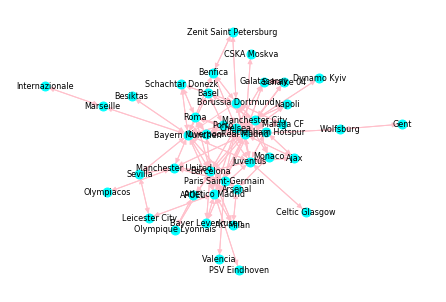

In [71]:
nx.draw(gChampions , with_labels=True, node_color='Cyan', edge_color='Pink', font_size=8 , node_size = 80)

Grafo No Dirigido  (solamente para compararlo con el anterior)

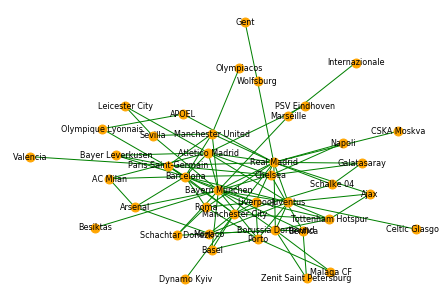

In [72]:
nx.draw(gChampions2 , with_labels=True, node_color='Orange', edge_color='Green', font_size=8 , node_size = 80)

#### c) Analizando el Grafo Dirigido 

Matriz de Adyacencia

In [73]:
print("Matriz de Adyacencia de G:\n")
A = nx.adjacency_matrix(gChampions)
print(A.todense())


Matriz de Adyacencia de G:

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Medidas de Centralidad, Histograma de Grado y Verificación de la Paradoja de la amistad


Centralidad del Grafo:

                   Nodo  Grado    Degree  Closeness  Betweenness
0           Real Madrid     31  0.756098   0.602941     0.340628
1        Bayern Munchen     30  0.731707   0.585714     0.282071
2             Barcelona     26  0.634146   0.539474     0.135723
3              Juventus     20  0.487805   0.532468     0.109646
4       Manchester City     18  0.439024   0.471264     0.094165
5       Atletico Madrid     18  0.439024   0.512500     0.120948
6     Borussia Dortmund     17  0.414634   0.455556     0.088094
7   Paris Saint-Germain     14  0.341463   0.471264     0.066022
8               Chelsea     13  0.317073   0.465909     0.036826
9     Manchester United     12  0.292683   0.482353     0.064557
10            Liverpool     12  0.292683   0.493976     0.014626
11                Porto     12  0.292683   0.422680     0.023580


Histograma


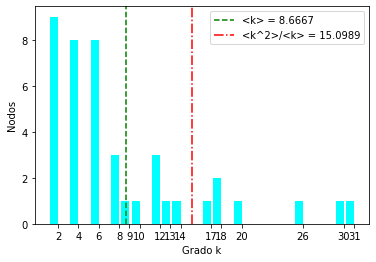

Verifica Paradoja de la Amistad
knn(k) = 15.0989 ; <k> = 8.6667 ; knn(k) - <k> = 6.4322 ; por lo tanto Si, se cumple la paradoja de la amistad.


In [74]:
print ('\nCentralidad del Grafo:\n')
print(dataframe(gChampions))
print ('\n')

print('Histograma')
histograma(gChampions)

print('Verifica Paradoja de la Amistad')
print(verifica_paradoja(gChampions))


#### d) Mejorando la visualización del Grafo Dirigido 

Se utiliza el grado para dar un "peso" (tamaños) distinto a cada nodo en el grafo.   

En este caso particular, el grado (número de conexiones de un nodo) representa la cantidad de partidos que ha jugado un equipo "de local" contra otros.  Asi un partido jugado implica grado 1, dos partidos grado 2, etc.  De este forma los equipos con más partidos jugados "predominan" en este campeonato y eso es lo que queremos poder visualizar.

In [75]:
grado2 = nx.degree(gChampions)
GradoNodo2={}
for k in grado2:
    keyValue=k
    GradoNodo2[keyValue[0]]=keyValue[1]
    

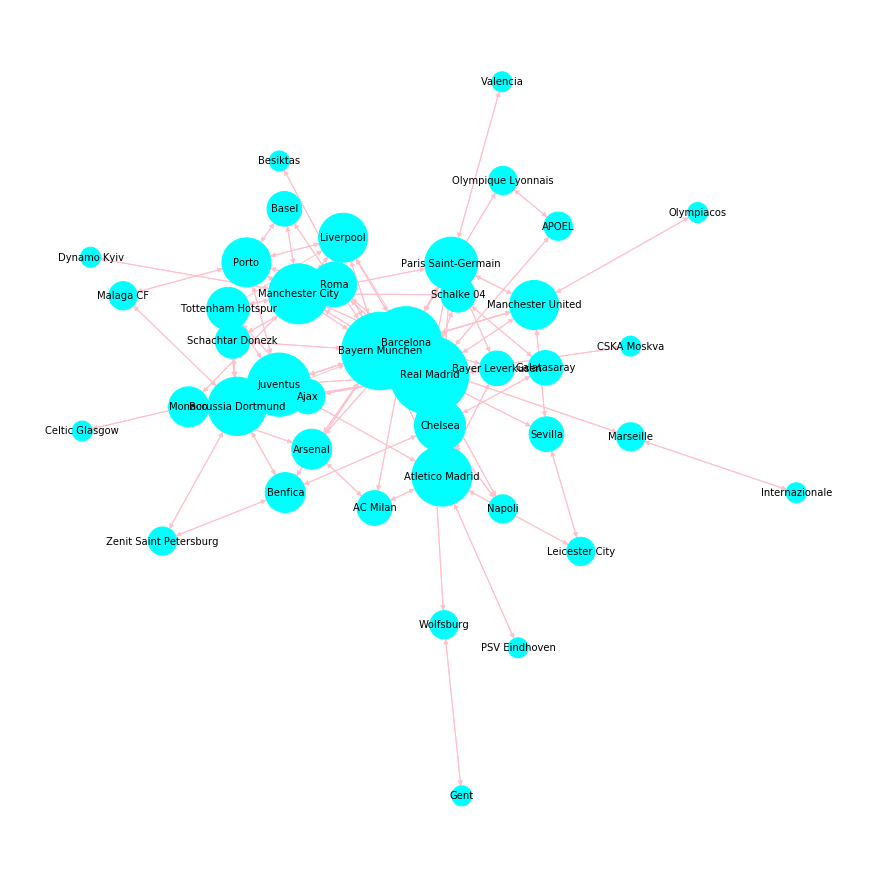

In [77]:
plt.figure(5,figsize=(12,12)) 
nx.draw(gChampions, with_labels=True, node_color='Cyan', edge_color='Pink' , font_size =10  ,
        node_size=[x * 200 for x in GradoNodo2.values()] , label_pos=0 )
plt.show()


#### Breve Paréntesis 

La visualización se podría mejorar si el grado pudiera representarse con un color distinto.   Con este fin (y por diversión) se busca un dataset que contiene los "colores seguros" de html y se aplica a la visualización de la red.

In [79]:
import pandas as pd
df4 = pd.read_csv('colores_html.csv',sep=';')

print("\nInformación del dataset cargado :\n---------------------------------\n")
df4.info()

print("\nLista de Columnas :\n-------------------")
list(df4)



Información del dataset cargado :
---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
numero         143 non-null int64
familia        143 non-null object
nombre         143 non-null object
hexadecimal    143 non-null object
rgb            143 non-null object
dtypes: int64(1), object(4)
memory usage: 5.7+ KB

Lista de Columnas :
-------------------


['numero', 'familia', 'nombre', 'hexadecimal', 'rgb']

In [80]:
df4.head(5)


,numero,familia,nombre,hexadecimal,rgb
0,122,BLANCO,ALICEBLUE,#F0F8FF,"RGB(240, 248, 255)"
1,130,BLANCO,ANTIQUEWHITE,#FAEBD7,"RGB(250, 235, 215)"
2,75,AZUL,AQUA,#00FFFF,"RGB(0, 255, 255)"
3,79,AZUL,AQUAMARINE,#7FFFD4,"RGB(127, 255, 212)"
4,121,BLANCO,AZURE,#F0FFFF,"RGB(240, 255, 255)"


In [81]:
df4.tail(5) 


,numero,familia,nombre,hexadecimal,rgb
138,104,MARRÓN,WHEAT,#F5DEB3,"RGB(245, 222, 179)"
139,117,BLANCO,WHITE,#FFFFFF,"RGB(255, 255, 255)"
140,124,BLANCO,WHITESMOKE,#F5F5F5,"RGB(245, 245, 245)"
141,23,AMARILLA,YELLOW,#FFFF00,"RGB(255, 255, 0)"
142,66,VERDE,YELLOWGREEN,#9ACD32,"RGB(154, 205, 50)"


In [82]:
colores = df4[ (df4['familia'] != 'BLANCO') & ( df4['familia'] != 'GRIS') ]
colores.head()


,numero,familia,nombre,hexadecimal,rgb
2,75,AZUL,AQUA,#00FFFF,"RGB(0, 255, 255)"
3,79,AZUL,AQUAMARINE,#7FFFD4,"RGB(127, 255, 212)"
6,102,MARRÓN,BISQUE,#FFE4C4,"RGB(255, 228, 196)"
8,101,MARRÓN,BLANCHEDALMOND,#FFEBCD,"RGB(255, 235, 205)"
9,95,AZUL,BLUE,#0000FF,"RGB(0, 0, 255)"


In [83]:
df4 = colores.sort_values('familia')
df4.head()


,numero,familia,nombre,hexadecimal,rgb
48,22,AMARILLA,GOLD,#FFD700,"RGB(255, 215, 0)"
58,31,AMARILLA,KHAKI,#F0E68C,"RGB(240, 230, 140)"
62,25,AMARILLA,LEMONCHIFFON,#FFFACD,"RGB(255, 250, 205)"
109,29,AMARILLA,PEACHPUFF,#FFDAB9,"RGB(255, 218, 185)"
108,27,AMARILLA,PAPAYAWHIP,#FFEFD5,"RGB(255, 239, 213)"


In [84]:
color_map_2 = []
for col in df4['nombre'] :
    color_map_2.append(col)


In [85]:
print (color_map_2)


['GOLD', 'KHAKI', 'LEMONCHIFFON', 'PEACHPUFF', 'PAPAYAWHIP', 'PALEGOLDENROD', 'DARKKHAKI', 'MOCCASIN', 'LIGHTGOLDENRODYELLOW', 'YELLOW', 'LIGHTYELLOW', 'AQUA', 'DODGERBLUE', 'LIGHTBLUE', 'LIGHTCYAN', 'LIGHTSTEELBLUE', 'MEDIUMSLATEBLUE', 'DEEPSKYBLUE', 'MEDIUMTURQUOISE', 'MIDNIGHTBLUE', 'NAVY', 'PALETURQUOISE', 'POWDERBLUE', 'ROYALBLUE', 'SKYBLUE', 'STEELBLUE', 'TURQUOISE', 'MEDIUMBLUE', 'DARKTURQUOISE', 'LIGHTSKYBLUE', 'BLUE', 'DARKBLUE', 'CORNFLOWERBLUE', 'AQUAMARINE', 'CADETBLUE', 'CYAN', 'BURLYWOOD', 'BROWN', 'PERU', 'CHOCOLATE', 'NAVAJOWHITE', 'MAROON', 'ROSYBROWN', 'DARKGOLDENROD', 'CORNSILK', 'SANDYBROWN', 'SIENNA', 'BLANCHEDALMOND', 'GOLDENROD', 'BISQUE', 'TAN', 'WHEAT', 'SADDLEBROWN', 'DARKORANGE', 'CORAL', 'ORANGE', 'TOMATO', 'LIGHTSALMON', 'ORANGERED', 'BLUEVIOLET', 'PLUM', 'DARKSLATEBLUE', 'PURPLE', 'REBECCAPURPLE', 'SLATEBLUE', 'THISTLE', 'VIOLET', 'ORCHID', 'MEDIUMSLATEBLUE', 'DARKVIOLET', 'MEDIUMPURPLE', 'MEDIUMORCHID', 'FUCHSIA', 'MAGENTA', 'INDIGO', 'DARKORCHID', 'LAVEN

In [86]:
print (GradoNodo2)


{'Olympique Lyonnais': 4, 'APOEL': 4, 'Bayer Leverkusen': 6, 'Barcelona': 26, 'Zenit Saint Petersburg': 4, 'Benfica': 8, 'AC Milan': 6, 'Arsenal': 8, 'CSKA Moskva': 2, 'Real Madrid': 31, 'Napoli': 4, 'Chelsea': 13, 'Marseille': 4, 'Internazionale': 2, 'Basel': 6, 'Bayern Munchen': 30, 'Celtic Glasgow': 2, 'Juventus': 20, 'Valencia': 2, 'Paris Saint-Germain': 14, 'Schachtar Donezk': 6, 'Borussia Dortmund': 17, 'Manchester United': 12, 'Porto': 12, 'Malaga CF': 4, 'Galatasaray': 6, 'Schalke 04': 6, 'Manchester City': 18, 'Atletico Madrid': 18, 'Olympiacos': 2, 'Monaco': 8, 'Roma': 10, 'Gent': 2, 'Wolfsburg': 4, 'PSV Eindhoven': 2, 'Dynamo Kyiv': 2, 'Sevilla': 6, 'Leicester City': 4, 'Tottenham Hotspur': 9, 'Liverpool': 12, 'Besiktas': 2, 'Ajax': 6}


In [87]:
colorNODE_map=[]
for nodo in gChampions:
    colorNODE_map.append(color_map_2[GradoNodo2[nodo]*3])
    

In [88]:
print(colorNODE_map)

['DODGERBLUE', 'DODGERBLUE', 'MEDIUMTURQUOISE', 'CRIMSON', 'DODGERBLUE', 'SKYBLUE', 'MEDIUMTURQUOISE', 'SKYBLUE', 'DARKKHAKI', 'DARKSEAGREEN', 'DODGERBLUE', 'CHOCOLATE', 'DODGERBLUE', 'DARKKHAKI', 'MEDIUMTURQUOISE', 'PINK', 'DARKKHAKI', 'PLUM', 'DARKKHAKI', 'ROSYBROWN', 'MEDIUMTURQUOISE', 'WHEAT', 'BURLYWOOD', 'BURLYWOOD', 'DODGERBLUE', 'MEDIUMTURQUOISE', 'MEDIUMTURQUOISE', 'CORAL', 'CORAL', 'DARKKHAKI', 'SKYBLUE', 'BLUE', 'DARKKHAKI', 'DODGERBLUE', 'DARKKHAKI', 'DARKKHAKI', 'MEDIUMTURQUOISE', 'DODGERBLUE', 'MEDIUMBLUE', 'BURLYWOOD', 'DARKKHAKI', 'MEDIUMTURQUOISE']


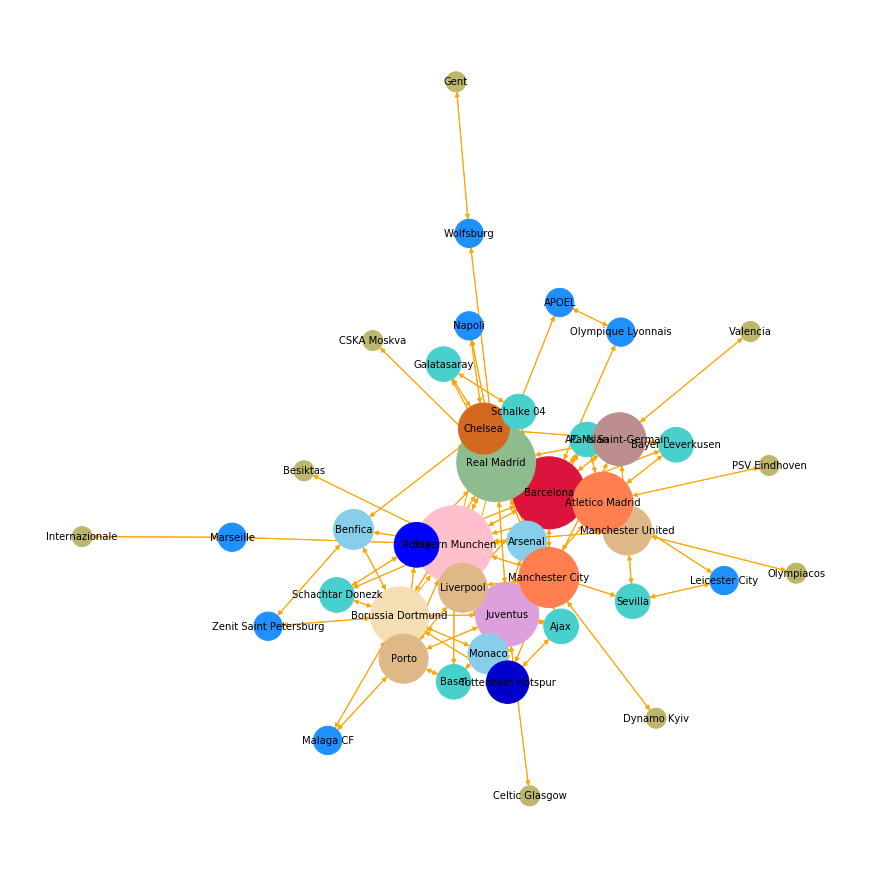

In [89]:
plt.figure(5,figsize=(12,12)) 
nx.draw(gChampions, with_labels=True, node_color=colorNODE_map, edge_color='Orange' , font_size =10  ,
        node_size=[x * 200 for x in GradoNodo2.values()] , label_pos=0 )
plt.show()


#### Fin del paréntesis.

Utilizando un layout diferente se pueden obtener resultados interesantes. Por ejemplo empleando un patrón circular.

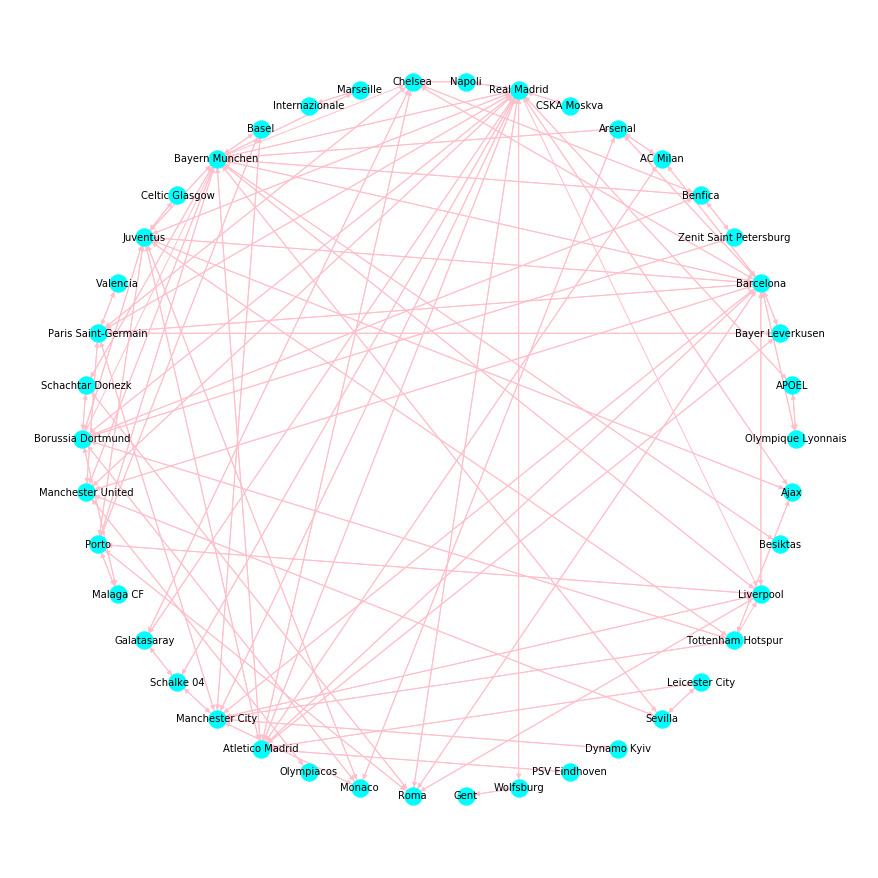

In [90]:
pos = nx.circular_layout(gChampions )
plt.figure(3,figsize=(12,12)) 
nx.draw(gChampions ,pos,node_color='Cyan', edge_color='Pink', font_size=10, with_labels=True)
plt.show()

#### Observaciones :

Cómo se comentó en clases, una de las ventajas de realizar un grafo es que VISUALMENTE podemos realizar de manera sencilla análisis que de otra forma serían más complejos o imposibles de realizar. 

Por ejemplo, con este layout podemos ver que :
- Roma v/s Mónaco o 
- Manchester City v/s Milan o 
- Málaga CF v/s Galatasaray o 
- Barcelona v/s Sevilla 

son partidos que nunca se han jugado, al menos en los últimos 8 años.

---

#### Bonus ( para los amantes del fútbol y de la Champions League)

In [91]:
import pandas as pd
df5 = pd.read_csv('LogosClubes.csv',sep=';')

print("\nInformación del dataset cargado :\n---------------------------------\n")
df5.info()

print("\nLista de Columnas :\n-------------------")
list(df5)



Información del dataset cargado :
---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
NombreClub         42 non-null object
ArchivoLogoClub    42 non-null object
dtypes: object(2)
memory usage: 800.0+ bytes

Lista de Columnas :
-------------------


['NombreClub', 'ArchivoLogoClub']

In [92]:
df5

,NombreClub,ArchivoLogoClub
0,AC Milan,50058.png
1,Ajax,50143.png
2,APOEL,50118.png
3,Arsenal,52280.png
4,Atletico Madrid,50124.png
5,Barcelona,50080.png
6,Basel,59856.png
7,Bayer Leverkusen,50109.png
8,Bayern Munchen,50037.png
9,Benfica,50147.png


In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import networkx as nx

In [94]:
gChampions3 = nx.Graph(name="Champions3 (Graph)")

for indice_fila, fila in df3[['Equipo1', 'Equipo2']].iterrows():

    equipo1 = fila['Equipo1']
    paso =  df5.loc[df5.loc[:, 'NombreClub'] == equipo1]
    logo1 =  mpimg.imread('logos/' + paso.iloc[0]['ArchivoLogoClub'])

    equipo2 = fila['Equipo2']
    paso = df5.loc[df5.loc[:, 'NombreClub'] == equipo2 ]
    logo2 = mpimg.imread('logos/' + paso.iloc[0]['ArchivoLogoClub'] )

    gChampions3.add_node(equipo1, image = logo1 )
    gChampions3.add_node(equipo2, image = logo2 )
    gChampions3.add_edge(equipo1,equipo2 ) 

print (nx.info(gChampions3))  


Name: Champions3 (Graph)
Type: Graph
Number of nodes: 42
Number of edges: 93
Average degree:   4.4286


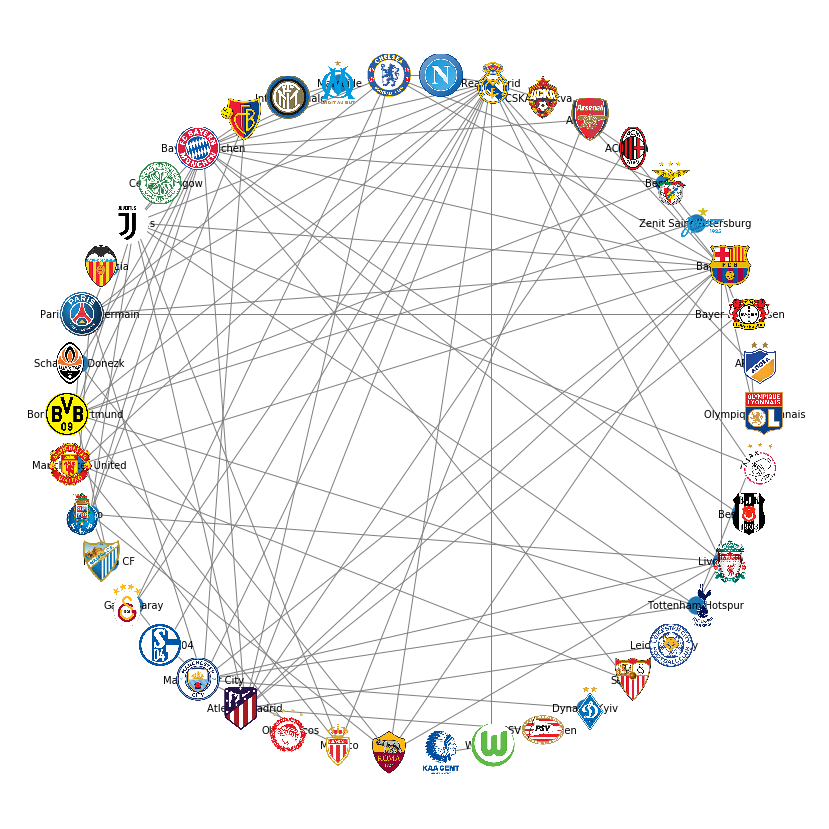

In [96]:
pos=nx.circular_layout(gChampions3)

fig=plt.figure(figsize=(15,15))
ax=plt.subplot(111)
ax.set_aspect('equal')

nx.draw_networkx(gChampions3,pos,font_size=10, edge_color='Grey')

plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.04 # this is the image size
p2=piesize/2.0
for n in gChampions3:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(gChampions3.node[n]['image'])
    a.axis('off')
ax.axis('off')

plt.show()

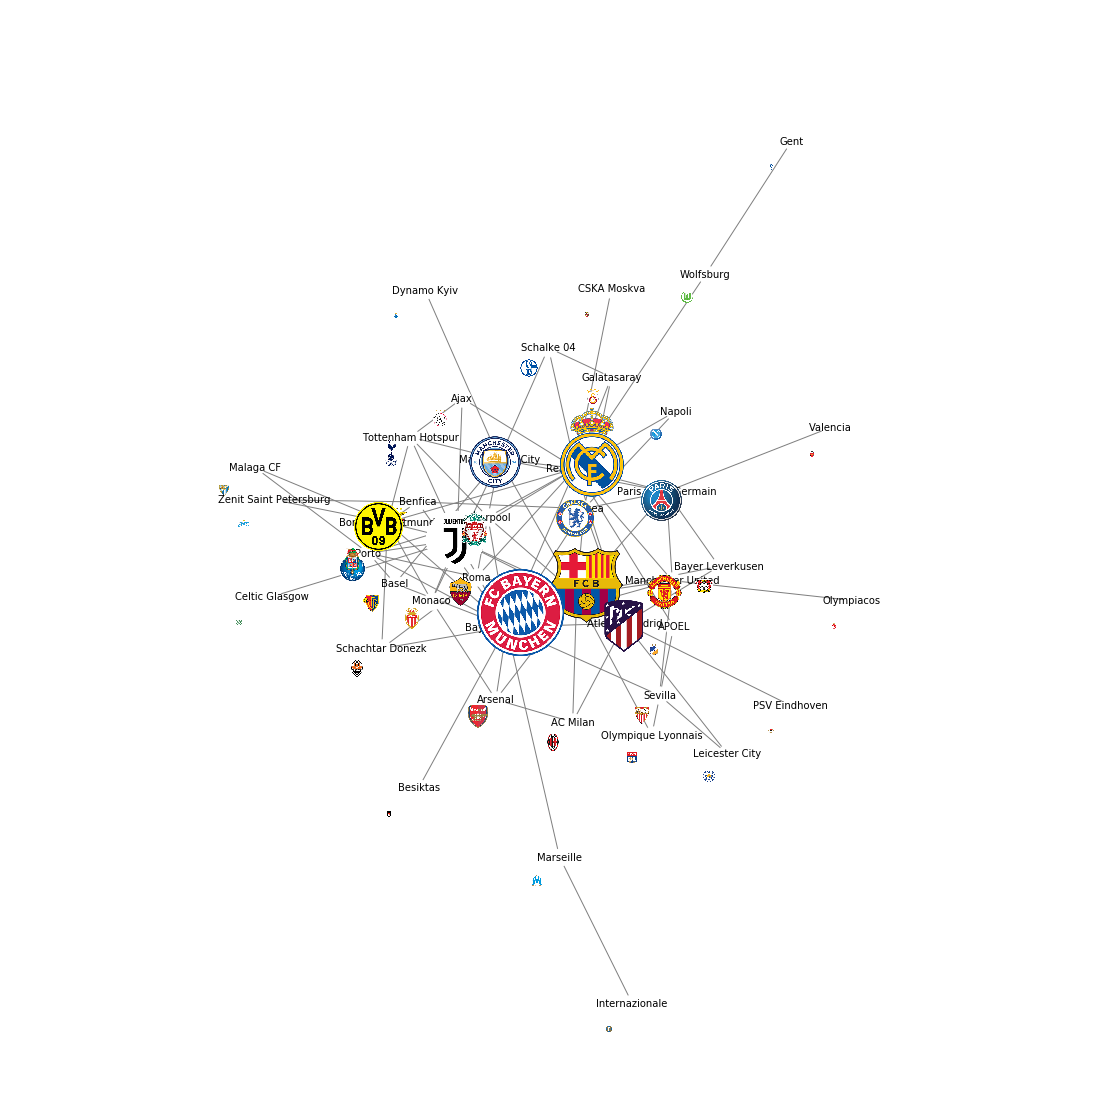

In [150]:
pos = nx.spring_layout(gChampions3)

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)
ax.set_aspect('equal')

nx.draw_networkx(gChampions3,pos,font_size=10, edge_color='Grey', node_color='white')

plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.04 # this is the image size
p2=piesize/2.0
for n in gChampions3:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    #ps=piesize
    ps=GradoNodo2[n]/500
    a = plt.axes([xa-p2,ya-p2, ps, ps])
    a.set_aspect('equal')
    a.imshow(gChampions3.node[n]['image'])
    a.axis('off')
ax.axis('off')

plt.show()


#### Comentarios :
Real Madrid, Bayern Munich y Barcelona, han sido los claros dominadores de está competencia en los últimos 8 años.

---

#### TERCERA PARTE 
### <font color='red'>MultiGrafos </font> | Multi Graphs

Un grafo que permite más de un enlace entre 2 nodos.

En su documentación oficial __NetworkX__ declara que no es el mejor paquete para graficar, ya que su fin es el análisis más que la representación gráfica.  
Para este fin varios foros recomiendan usar otros paquetes como __graphviz__.

Para no repetir lo visto en los puntos anteriores, se nos ha ocurrido realizar una especie de juego de palabras, que consiste en que dada una palabra se generará el multigrafo correspondiente. Así cada letra será un nodo y cada letra siguiente se unirá a la anterior por una arista dirigida.

Fuente : https://networkx.github.io/documentation/stable/reference/classes/multigraph.html

Más Información : https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.MultiGraph.nodes.html?highlight=multigraphs


In [133]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections


In [134]:
def grafica_palabra (palabra):
    
    pal = palabra.upper()
    colores = ['GOLD', 'KHAKI', 'LEMONCHIFFON', 'PEACHPUFF', 'PAPAYAWHIP', 'PALEGOLDENROD', 'DARKKHAKI', 'MOCCASIN', 'LIGHTGOLDENRODYELLOW', 'YELLOW', 'LIGHTYELLOW', 'AQUA', 'DODGERBLUE', 'LIGHTBLUE', 'LIGHTCYAN', 'LIGHTSTEELBLUE', 'MEDIUMSLATEBLUE', 'DEEPSKYBLUE', 'MEDIUMTURQUOISE', 'MIDNIGHTBLUE', 'NAVY', 'PALETURQUOISE', 'POWDERBLUE', 'ROYALBLUE', 'SKYBLUE', 'STEELBLUE', 'TURQUOISE', 'MEDIUMBLUE', 'DARKTURQUOISE', 'LIGHTSKYBLUE', 'BLUE', 'DARKBLUE', 'CORNFLOWERBLUE', 'AQUAMARINE', 'CADETBLUE', 'CYAN', 'BURLYWOOD', 'BROWN', 'PERU', 'CHOCOLATE', 'NAVAJOWHITE', 'MAROON', 'ROSYBROWN', 'DARKGOLDENROD', 'CORNSILK', 'SANDYBROWN', 'SIENNA', 'BLANCHEDALMOND', 'GOLDENROD', 'BISQUE', 'TAN', 'WHEAT', 'SADDLEBROWN', 'DARKORANGE', 'CORAL', 'ORANGE', 'TOMATO', 'LIGHTSALMON', 'ORANGERED', 'BLUEVIOLET', 'PLUM', 'DARKSLATEBLUE', 'PURPLE', 'REBECCAPURPLE', 'SLATEBLUE', 'THISTLE', 'VIOLET', 'ORCHID', 'MEDIUMSLATEBLUE', 'DARKVIOLET', 'MEDIUMPURPLE', 'MEDIUMORCHID', 'FUCHSIA', 'MAGENTA', 'INDIGO', 'DARKORCHID', 'LAVENDER', 'DARKMAGENTA', 'CRIMSON', 'DARKSALMON', 'FIREBRICK', 'DARKRED', 'INDIANRED', 'SALMON', 'RED', 'LIGHTCORAL', 'LIGHTSALMON', 'PALEVIOLETRED', 'LIGHTPINK', 'DEEPPINK', 'PINK', 'MEDIUMVIOLETRED', 'HOTPINK', 'DARKSEAGREEN', 'MEDIUMSPRINGGREEN', 'FORESTGREEN', 'TEAL', 'MEDIUMAQUAMARINE', 'LIMEGREEN', 'SPRINGGREEN', 'GREEN', 'GREENYELLOW', 'OLIVE', 'OLIVEDRAB', 'LIME', 'DARKCYAN', 'LIGHTSEAGREEN', 'CHARTREUSE', 'LAWNGREEN', 'DARKOLIVEGREEN', 'MEDIUMSEAGREEN', 'PALEGREEN', 'DARKGREEN', 'LIGHTGREEN', 'SEAGREEN', 'YELLOWGREEN']
    grafoX = nx.MultiDiGraph(name=palabra)
    
    for i in range(1,len(pal)):
        # print (i,pal[i-1],'-->',pal[i])
        grafoX.add_edge
        grafoX.add_node(pal[i-1])
        grafoX.add_node(pal[i])
        grafoX.add_edge(pal[i-1],pal[i] )
    
    if pal in colores:
        col = pal;
    else: 
        col = 'Cyan'

    print (nx.info(grafoX))  
    
    nx.draw(grafoX, with_labels=True, node_color=col, edge_color='black' , font_size =10  ,
        node_size=400 , label_pos=0 )    
    

Name: Blue
Type: MultiDiGraph
Number of nodes: 4
Number of edges: 3
Average in degree:   0.7500
Average out degree:   0.7500


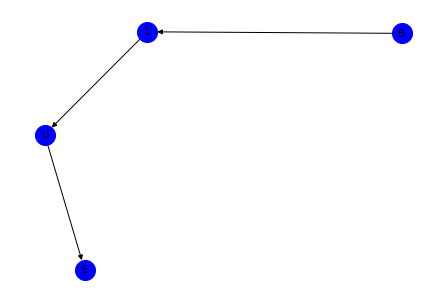

In [135]:
grafica_palabra ('Blue')

Name: Red
Type: MultiDiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667


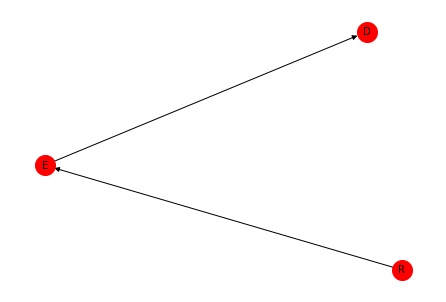

In [136]:
grafica_palabra ('Red')

Name: Yellow
Type: MultiDiGraph
Number of nodes: 5
Number of edges: 5
Average in degree:   1.0000
Average out degree:   1.0000


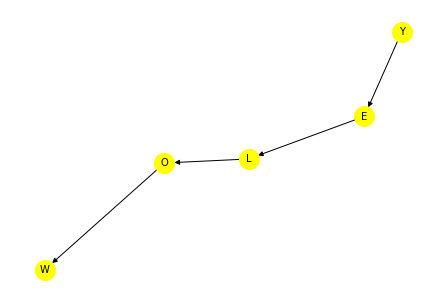

In [137]:
grafica_palabra ('Yellow')

Name: Green
Type: MultiDiGraph
Number of nodes: 4
Number of edges: 4
Average in degree:   1.0000
Average out degree:   1.0000


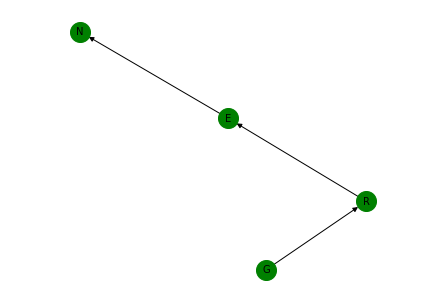

In [138]:
grafica_palabra ('Green')

Name: banana
Type: MultiDiGraph
Number of nodes: 3
Number of edges: 5
Average in degree:   1.6667
Average out degree:   1.6667


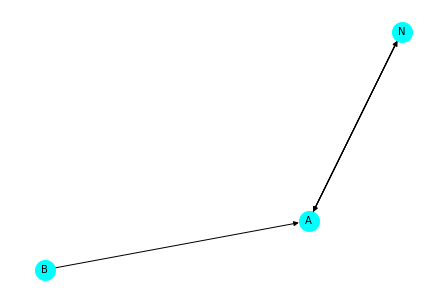

In [139]:
grafica_palabra ('banana')

Name: Leo Ferres
Type: MultiDiGraph
Number of nodes: 7
Number of edges: 9
Average in degree:   1.2857
Average out degree:   1.2857


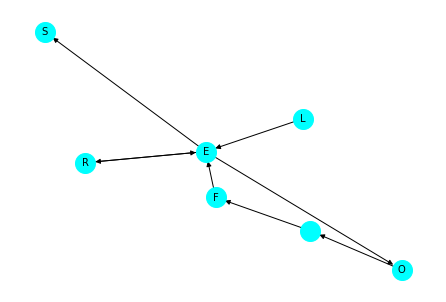

In [142]:
grafica_palabra ('Leo Ferres')

--- 

#### Referencias

Para la realización de este trabajo se consultaron y tomaron ejemplos de varias páginas, cuidándo de no caer en copia para producir un trabajo original.

- networkx.github.io  
- datetime.strptime
- https://datacarpentry.org/python-ecology-lesson-es/05-merging-data/
- https://www.geeksforgeeks.org/python-pandas-dataframe/
- https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
- https://www.analyticslane.com/2019/03/18/comparar-los-registros-de-dos-dataframes-con-pandas/
- https://riptutorial.com/es/pandas/example/5744/renombrar-una-columna
- https://www.interactivechaos.com/manual/tutorial-de-pandas/ordenacion-de-dataframes-por-valor
- https://appdividend.com/2019/01/26/pandas-set-index-example-python-set_index-tutorial/
- https://www.interactivechaos.com/python/scenario/distribucion-de-los-elementos-de-una-serie-pandas-segun-su-frecuencia
- http://lineadecodigo.com/python/anadir-un-elemento-a-una-lista-en-python/
- https://devcode.la/tutoriales/diccionarios-en-python/
- https://revistadigital.inesem.es/informatica-y-tics/teoria-grafos/
- http://micaminomaster.com.co/grafo-algoritmo/grafos-dinamicos-python/
- http://138.100.100.254/index/departamentos/matematicas/manchon/pman_archivos/PFCSusana22.pdf
- https://ccc.inaoep.mx/~esucar/Clases-van/van5-modelos.pdf
- https://stackoverflow.com/questions/53967392/creating-a-graph-with-images-as-nodes
- https://www.pythond.com/25812/como-cambiar-el-formato-de-fecha-y-hora-en-pandas.html
- https://www.analyticslane.com/2018/09/10/unir-y-combinar-dataframes-con-pandas-en-python/
- https://datacarpentry.org/python-ecology-lesson-es/03-index-slice-subset/
- http://ars-uns.blogspot.com/2016/06/importando-datos-de-excel-gephi.html
- https://gist.github.com/Fhernd/f48faced9adb3cf5ea6e21a6d0d6aae8
- https://www.cs.us.es/~fran/curso_unia/red.html
- https://www.analyticslane.com/2019/06/21/seleccionar-filas-y-columnas-en-pandas-con-iloc-y-loc/
- https://networkx.github.io/documentation/stable/reference/classes/graph.html
- http://sparkandshine.net/networkx-application-notes-draw-a-graph-with-matplotlib/
- https://docplayer.net/8702392-Networkx-network-analysis-with-python.html
 
---